# Regression using TPOT for optimization

In [70]:
import pandas as pd
import numpy as np
#use widget instead of inline to make the plot interactive
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
font = {'size'   : 15}
plt.rc('font', **font)


In [71]:
df = pd.read_pickle('data/df_day_pc.pkl')
X_features = df[['principal component {}'.format(s+1) for s in range(9)]]
y_target = df['casual']

In [72]:
df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,casual
0,-1.488972,-1.047499,1.605775,2.289455,0.201128,-0.239440,-0.010536,-0.287175,-0.816473,-0.693076,0.355749,-0.753734
1,-1.451751,-1.021663,1.645791,-1.233060,-0.471208,0.952538,-1.183593,0.170466,-1.114137,-0.403447,0.621143,-1.045214
2,-2.074937,-0.965831,-1.046103,-0.387641,-0.219641,-0.700964,0.107072,0.032208,0.104792,-1.358652,0.411562,-1.061246
3,-1.993973,-0.933343,-1.039374,-0.383966,-0.203686,-0.687122,0.107436,0.032091,0.095520,-1.336835,0.418367,-1.078734
4,-1.864799,-0.882715,-1.028881,-0.377580,-0.179399,-0.665770,0.107072,0.031685,0.082570,-1.303137,0.429540,-1.116627


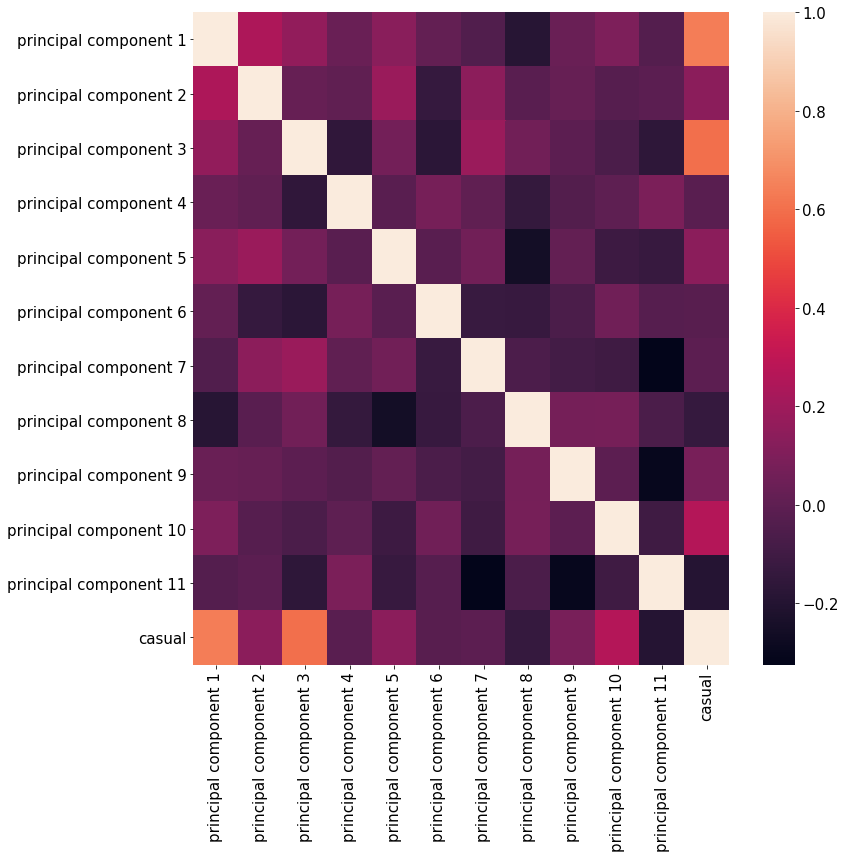

In [73]:
correlations = df.corr(method='spearman')
plt.rcParams['figure.figsize'] = [12, 12]
sns.heatmap(correlations, 
        xticklabels=correlations.columns,
        yticklabels=correlations.columns)
plt.savefig('data/spearman.png')


In [74]:
from tpot import TPOTRegressor
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.15, random_state = 42)

In [75]:
tpot = TPOTRegressor(generations=5, population_size=100,verbosity=2,n_jobs=-1,scoring='neg_mean_absolute_error')

In [76]:
tpot.fit(x_train, y_train)

Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.3135233270286807

Generation 2 - Current best internal CV score: -0.3135233270286807

Generation 3 - Current best internal CV score: -0.3135233270286807

Generation 4 - Current best internal CV score: -0.31215997025489206

Generation 5 - Current best internal CV score: -0.31187700742243873

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.8, min_samples_leaf=1, min_samples_split=8, n_estimators=100)


TPOTRegressor(generations=5, n_jobs=-1, scoring='neg_mean_absolute_error',
              verbosity=2)

In [77]:
print(tpot.score(x_test,y_test))

-0.32108880030900844


In [78]:
y_pred = tpot.predict(x_test)

In [79]:
m,b = np.polyfit(y_test,y_pred,1)

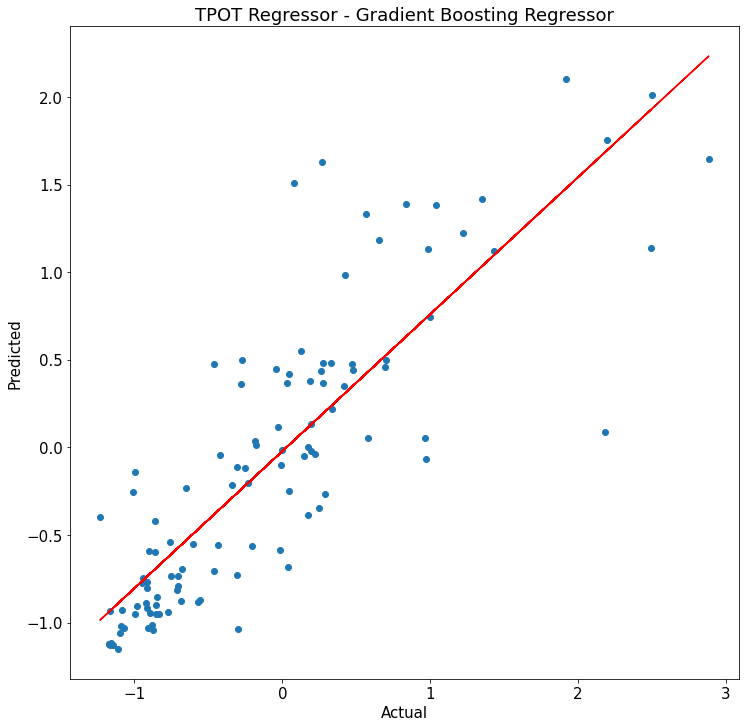

In [80]:
plt.scatter(y_test,y_pred)
plt.plot(y_test, m*y_test+b,'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('TPOT Regressor - Gradient Boosting Regressor')
plt.savefig('data/tpot_Linear_bike.png')

In [81]:
tpot.export('linear_reg.py')

## Using the linear regression directly

In [82]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)
y_prediction =  LR.predict(x_test)

In [83]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is ',score)
print('mean_sqrd_error =',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error =',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.6314774221286297
mean_sqrd_error = 0.29339083855915243
root_mean_squared error = 0.5416556457373563


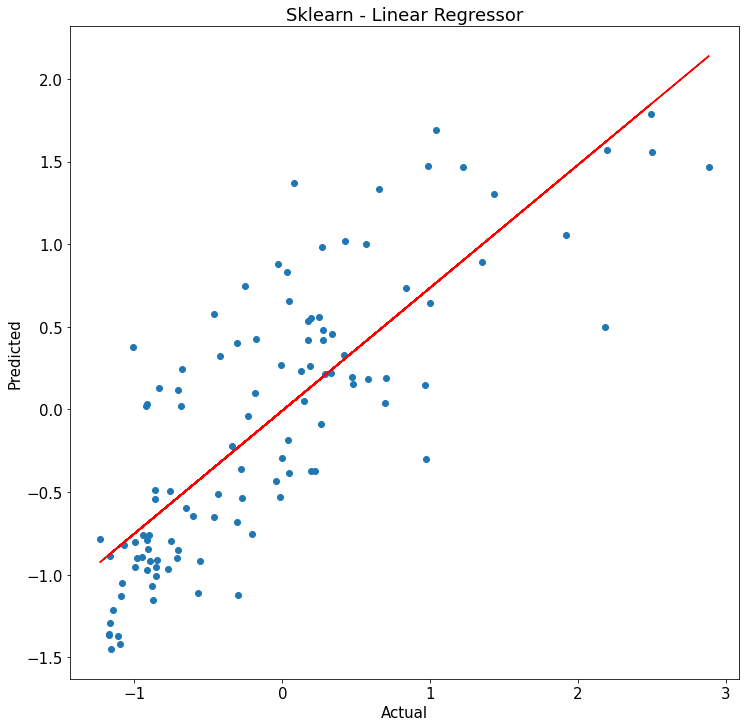

In [84]:
y_pred = LR.predict(x_test)
m,b = np.polyfit(y_test,y_pred,1)
plt.scatter(y_test,y_pred)
plt.plot(y_test, m*y_test+b,'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Sklearn - Linear Regressor')
plt.savefig('data/sklean_Linear_bike.png')